Automatically created module for IPython interactive environment


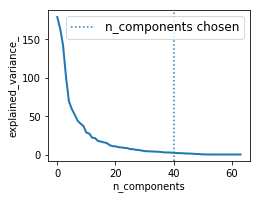

In [1]:
# http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(4,3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [20,40, 64]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using '__' separated parameter names:
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components,
                                   logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
           linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
estimators = [('reduce_dim', PCA()), ('svm', SVC())]
clf = Pipeline(estimators)
clf

Pipeline(steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [4]:
# normalizing data
from sklearn import preprocessing
normalized_X = preprocessing.normalize(X_digits)
normalized_X

array([[ 0.        ,  0.        ,  0.09024036, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.15413829,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.24153867,
         0.1358655 ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.0140138 , ...,  0.08408278,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.03044313, ...,  0.18265877,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.14230641, ...,  0.17076769,
         0.01423064,  0.        ]])

In [5]:
X_digits

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [9]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# load the CSV file as a numpy matrix
dataset = datasets.load_diabetes()
# separate the data from the target attributes
X = dataset[:,0:7]
y = dataset[:,8]
model = LogisticRegression()
model.fit(X, y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

TypeError: unhashable type: 'slice'

预测值为： [0 8 9 8]
真实值： [0 8 9 8]


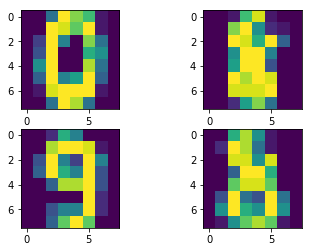

In [11]:
# https://ptorch.com/news/51.html
from sklearn import datasets
from sklearn import svm
import numpy as np
from matplotlib import pyplot as plt
'''
使用sciki-learn中的数据集，一般有data,target,DESCR等属性属性
'''
digits = datasets.load_digits()                 #加载scikit-learn中的数据集
clf = svm.SVC(gamma=0.001,C=100)                    #使用支持向量机进行分类，gamma为核函数的系数
clf.fit(digits.data[:-4],digits.target[:-4])        #将除最后4组的数据输入进行训练
predict = clf.predict(digits.data[-4:])         #预测最后4组的数据，[-4:]表示最后4行所有数据，而[-4,:]表示倒数第4行数据
print("预测值为：",predict)
print( "真实值：",digits.target[-4:])
#显示最后四个图像
plt.subplot(2,2,1)
plt.imshow(digits.data[-4,:].reshape(8,8))
plt.subplot(2,2,2)
plt.imshow(digits.data[-3,:].reshape(8,8))
plt.subplot(2,2,3)
plt.imshow(digits.data[-2,:].reshape(8,8))
plt.subplot(2,2,4)
plt.imshow(digits.data[-1,:].reshape(8,8))
plt.show()

In [12]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
import numpy as np
'''
加载scikit-learn中的鸢尾花数据集
'''
#加载鸢尾花数据集
iris = datasets.load_iris()
iris_data = iris.data;          #相当于X
iris_target = iris.target;      #对应的label种类，相当于y
x_train,x_test,y_train,y_test =     train_test_split(iris_data,iris_target,test_size=0.2)       #将数据分成训练集x_train和测试集x_test，测试集占总数据的0.2
model = SVC().fit(x_train,y_train);     #使用svm在训练集上拟合
predict = model.predict(x_test)         #在测试集上预测
right = sum(predict == y_test)          #求预测正确的个数
print ('测试集准确率：%f%%'%(right*100.0/predict.shape[0]))        #求在测试集上预测的正确率，shape[0]返回第一维的长度，即数据个数

测试集准确率：96.666667%


/Users/andrewy/anaconda/envs/tensorflow/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
# 一元线性回归, http://www.shareditor.com/blogshow?blogId=53
import numpy as np
from sklearn.linear_model import LinearRegression

x = [[1],[2],[3],[4],[5],[6]]
y = [[1],[2.1],[2.9],[4.2],[5.1],[5.8]]
model = LinearRegression()
model.fit(x, y)
predicted = model.predict([13])[0]
print(predicted)

[ 12.82666667]


/Users/andrewy/anaconda/envs/tensorflow/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Users/andrewy/anaconda/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


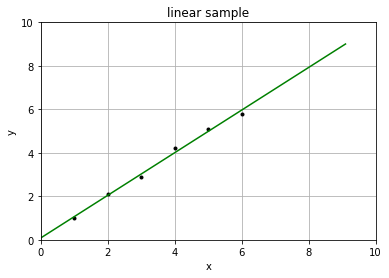

In [17]:
#划线 http://www.shareditor.com/blogshow?blogId=53
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

x = [[1],[2],[3],[4],[5],[6]]
y = [[1],[2.1],[2.9],[4.2],[5.1],[5.8]]
model = LinearRegression()
model.fit(x, y)
x2 = [[0], [2.5], [5.3], [9.1]]
y2 = model.predict(x2)

plt.figure()
plt.title('linear sample')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0, 10, 0, 10])
plt.grid(True)
plt.plot(x, y, 'k.') #k表示卡其色khaki，g表示绿色green，r表示红色red，'.'表示点，'-'表示线
plt.plot(x2, y2, 'g-')
plt.show()